In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [9]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [12]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace = True)

In [13]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [14]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [16]:
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [17]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [20]:
X=df.drop(columns=['Exited'])
y = df['Exited']

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size = 0.2)

In [24]:
X_test.shape

(2000, 11)

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

## Model building

In [68]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [69]:
model = Sequential()
model.add(Dense(6,activation = 'relu',input_dim=11 ))
model.add(Dense(3,activation = 'relu' ))
model.add(Dense(1,activation='sigmoid'))

In [70]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 6)                 72        
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 21        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 4         
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________


In [71]:
model.compile(loss = 'binary_crossentropy',optimizer = 'Adam',metrics=['accuracy'])

In [72]:
history=model.fit(X_train_scaled,y_train,epochs=70,validation_split=0.2)

Epoch 1/70
200/200 [==============================] - 1s 2ms/step - loss: 0.5302 - accuracy: 0.7934 - val_loss: 0.4705 - val_accuracy: 0.7987
Epoch 2/70
200/200 [==============================] - 0s 2ms/step - loss: 0.4637 - accuracy: 0.7934 - val_loss: 0.4421 - val_accuracy: 0.7987
Epoch 3/70
200/200 [==============================] - 0s 2ms/step - loss: 0.4470 - accuracy: 0.7933 - val_loss: 0.4328 - val_accuracy: 0.8000
Epoch 4/70
200/200 [==============================] - 0s 2ms/step - loss: 0.4389 - accuracy: 0.7998 - val_loss: 0.4264 - val_accuracy: 0.8219
Epoch 5/70
200/200 [==============================] - 0s 2ms/step - loss: 0.4335 - accuracy: 0.8112 - val_loss: 0.4223 - val_accuracy: 0.8244
Epoch 6/70
200/200 [==============================] - 0s 2ms/step - loss: 0.4290 - accuracy: 0.8147 - val_loss: 0.4187 - val_accuracy: 0.8288
Epoch 7/70
200/200 [==============================] - 0s 2ms/step - loss: 0.4246 - accuracy: 0.8166 - val_loss: 0.4162 - val_accuracy: 0.8313
Epoch 

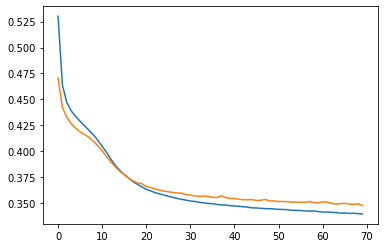

In [73]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

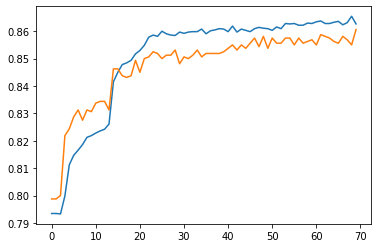

In [74]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [54]:
model.layers[1].get_weights()

[array([[-2.2168057e-01, -4.5772758e-03,  5.0381011e-01, -5.5208969e-01,
          3.8465765e-01,  1.4717621e-01,  4.3841511e-01,  3.5398480e-01,
         -2.7300885e-01,  2.2028463e-01,  3.9793453e-01],
        [-2.7150473e-01, -4.4680047e-01,  9.5563358e-01,  1.3548031e-02,
         -1.7694962e-01,  7.5216694e-03,  6.1593577e-02, -5.8853024e-01,
          2.3709609e-01, -9.3509501e-01,  3.0682757e-01],
        [-1.2783514e-01,  5.0721174e-01,  8.5967667e-02,  1.0369772e-01,
          4.0026736e-01, -2.3639452e-01,  4.2470416e-01,  6.2636334e-01,
          4.4940278e-01, -4.2966211e-01, -4.9762681e-01],
        [ 5.1711720e-01, -5.9482586e-01,  2.6133761e-01,  1.2145169e-01,
         -6.1446702e-01,  4.0831053e-01, -7.8487998e-01,  1.4472397e-01,
          1.7108563e-03,  6.3736401e-02, -3.1671813e-01],
        [ 2.9757115e-01, -2.1167481e-01, -4.5378387e-01,  8.6189157e-01,
          4.7808647e-02, -7.4582243e-01,  4.1389385e-01, -3.1078613e+00,
         -9.1869199e-01,  7.0387810e-0

In [75]:
y_log=model.predict(X_test_scaled)

In [76]:
y_pred=np.where(y_log>0.5,1,0)

In [77]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.865